# Regression

## Linear Regression

Build simple regression by Tensorflow

### Parameters

In [1]:
import numpy as np
import tensorflow as tf

sample_size = 100
learning_rate = 0.1
training_step = 2000
optimizer = tf.optimizers.SGD(learning_rate)

### Equation
 
$$
Y = 8X + 20 
$$

Create random W, b

In [2]:
# data
X = np.random.rand(sample_size).astype(np.float32)
Y = 8 * X + 20
# weights
W = tf.Variable(tf.random.uniform((1,), minval=0, maxval=100))
b = tf.Variable(tf.random.uniform((1,), minval=0, maxval=100))
print(f'W:{W.numpy()[0]}, b:{b.numpy()[0]}')

W:86.99745178222656, b:14.63726806640625


### Model

$$
Y = WX + b 
$$

In [3]:
def linear_regression(x):
    return W * x + b

### Loss Function

$$
Loss = {\sum_{}^{}{(y - \hat{y})^2} \over N}
$$

In [4]:
def loss_function(pred, ground_truth):
    return tf.reduce_sum(tf.pow(ground_truth - pred, 2)) / sample_size

### Fit the Model

In [5]:
def training():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = loss_function(Y, pred)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return gradients

# keep the weights updated process
W_progress = []
b_progress = []
for i in range(1, training_step + 1):
    training()
    W_progress.append(W.numpy())
    b_progress.append(b.numpy())
    if i % 100 == 0:
        pred = linear_regression(X)
        loss = loss_function(pred, Y)
        print(f'Step: {i}, Loss: {loss}, W: {W.numpy()[0]}, b: {b.numpy()[0]}')

Step: 100, Loss: 32.401527404785156, W: 29.72172737121582, b: 8.623357772827148
Step: 200, Loss: 3.7096424102783203, W: 15.349836349487305, b: 16.150562286376953
Step: 300, Loss: 0.42471569776535034, W: 10.486913681030273, b: 18.697490692138672
Step: 400, Loss: 0.04862569645047188, W: 8.84148120880127, b: 19.55927848815918
Step: 500, Loss: 0.005567188374698162, W: 8.284728050231934, b: 19.850875854492188
Step: 600, Loss: 0.0006373689975589514, W: 8.096339225769043, b: 19.949541091918945
Step: 700, Loss: 7.297457341337577e-05, W: 8.032598495483398, b: 19.982927322387695
Step: 800, Loss: 8.355265890713781e-06, W: 8.011030197143555, b: 19.99422264099121
Step: 900, Loss: 9.578037634128123e-07, W: 8.003734588623047, b: 19.998043060302734
Step: 1000, Loss: 1.1083615447660122e-07, W: 8.001270294189453, b: 19.99933433532715
Step: 1100, Loss: 1.3005810650668082e-08, W: 8.000434875488281, b: 19.999771118164062
Step: 1200, Loss: 1.5186014667989411e-09, W: 8.00014877319336, b: 19.999921798706055
S

The convergence of `W`

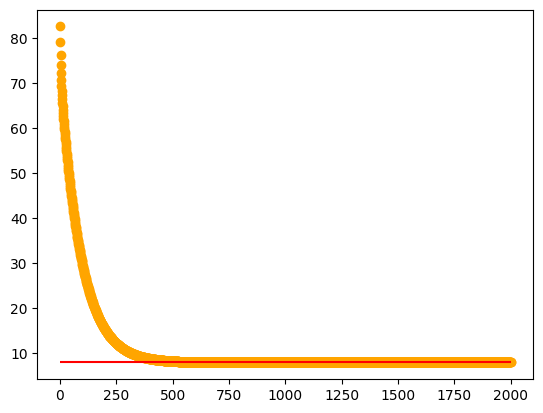

In [6]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(1, 2001, 2000), W_progress, color='orange')
plt.hlines(8, xmin=0, xmax=2000, color='red')

The convergence of `b`

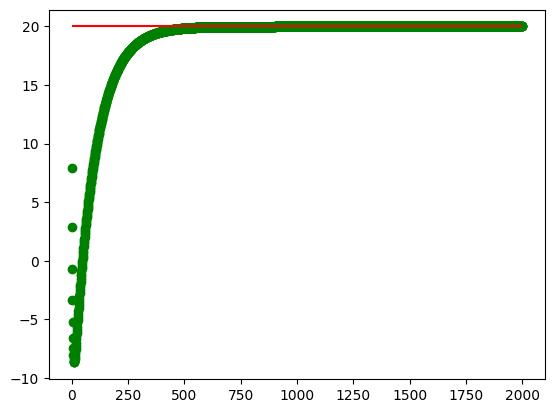

In [7]:
plt.scatter(np.linspace(1, 2001, 2000), b_progress, color='green')
plt.hlines(20, xmin=0, xmax=2000, color='red')

### Result

In [8]:
print(f'Y = {W.numpy()[0]}X + {b.numpy()[0]}')

print(f'Y = {round(W.numpy()[0], 2)}X + {round(b.numpy()[0], 2)}')

Y = 8.000067710876465X + 19.999961853027344
Y = 8.0X + 20.0


## Quadratic Function

### Parameters

While I tried lots of parameter settings, I found:
1. SGD is not good for quadratic function convergence, so I changed the optimizer to Adam
2. I tried SGD with a large learning rate, it caused the weights converg to nan

In [9]:
sample_size = 100
learning_rate = 0.1
training_step = 8000
# optimizer = tf.optimizers.SGD(learning_rate)
optimizer = tf.optimizers.Adam(learning_rate)

### Equation
 
$$
Y = 8X^2 + 12X + 20 
$$

$$
Y = W_1X^2 + W_2X + b 
$$

This time we have three parameters

In [10]:
# data
X = np.random.randint(low=-50, high=50, size=sample_size)
Y = 8 * X * X + 12 * X + 20

w1 = tf.Variable(tf.random.uniform((1,), minval=0, maxval=100))
w2 = tf.Variable(tf.random.uniform((1,), minval=0, maxval=100))
b = tf.Variable(tf.random.uniform((1,), minval=0, maxval=100))

print(f'w1:{w1.numpy()[0]}, w2:{w2.numpy()[0]}, b:{b.numpy()[0]}')

# equation

def quandratic(x):
    return w1 * x * x + w2 * x + b

w1:23.097919464111328, w2:30.802322387695312, b:16.334129333496094


Let's take a look the data

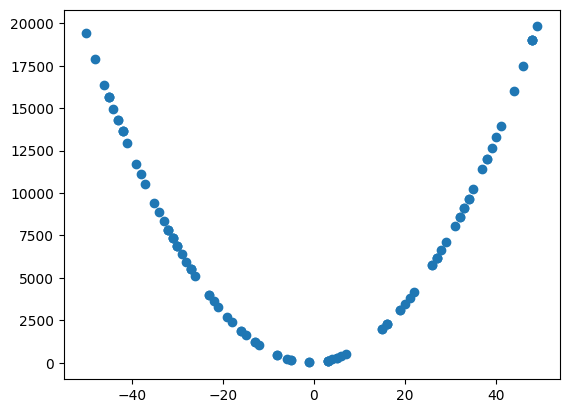

In [11]:
plt.scatter(X, Y)

### Loss Function

We use the same loss function as the simple regression

In [12]:
def loss_function(pred, ground_truth):
    return tf.reduce_sum(tf.pow(ground_truth - pred, 2)) / sample_size

### Fit the Model

In [13]:
def training():
    with tf.GradientTape() as g:
        pred = quandratic(X)
        loss = loss_function(Y, pred)
    gradients = g.gradient(loss, [w1, w2, b])
    optimizer.apply_gradients(zip(gradients, [w1, w2, b]))
    return gradients

# keep the weights updated process
w1_progress = []
w2_progress = []
b_progress = []
for i in range(1, training_step + 1):
    training()
    w1_progress.append(w1.numpy())
    w2_progress.append(w2.numpy())
    b_progress.append(b.numpy())
    if i % 100 == 0:
        pred = quandratic(X)
        loss = loss_function(pred, Y)
        print(f'Step: {i}, Loss: {loss}, W1: {w1.numpy()[0]}, W2: {w2.numpy()[0]}, b: {b.numpy()[0]}')

Step: 100, Loss: 57300468.0, W1: 14.472551345825195, W2: 36.79110336303711, b: 7.711287021636963
Step: 200, Loss: 5095362.0, W1: 9.913240432739258, W2: 30.381881713867188, b: 3.1629061698913574
Step: 300, Loss: 259916.9375, W1: 8.38797378540039, W2: 21.68988800048828, b: 1.6541335582733154
Step: 400, Loss: 18388.947265625, W1: 8.06790828704834, W2: 16.0678768157959, b: 1.3516727685928345
Step: 500, Loss: 1980.430908203125, W1: 8.02109146118164, W2: 13.393621444702148, b: 1.3224174976348877
Step: 600, Loss: 280.6811828613281, W1: 8.014334678649902, W2: 12.39322566986084, b: 1.3339098691940308
Step: 700, Loss: 139.77703857421875, W1: 8.012921333312988, W2: 12.088298797607422, b: 1.3521829843521118
Step: 800, Loss: 131.26864624023438, W1: 8.012574195861816, W2: 12.011438369750977, b: 1.373337745666504
Step: 900, Loss: 130.6099395751953, W1: 8.012494087219238, W2: 11.995428085327148, b: 1.3967128992080688
Step: 1000, Loss: 130.2408447265625, W1: 8.012470245361328, W2: 11.992717742919922, b

### Reuslt

The convergence of `w1`

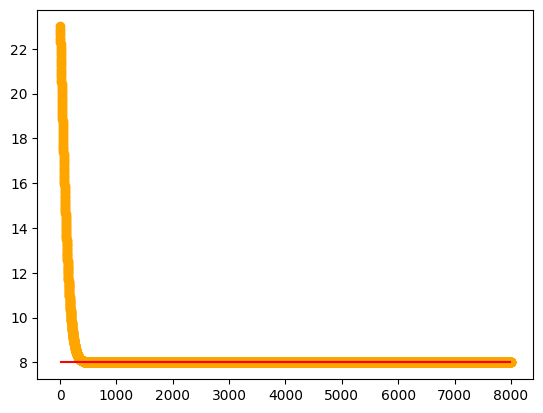

In [14]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(1, 8001, 8000), w1_progress, color='orange')
plt.hlines(8, xmin=0, xmax=8000, color='red')

The convergence of `w2`

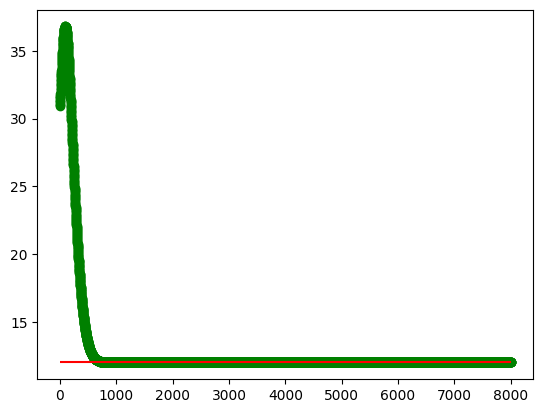

In [15]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(1, 8001, 8000), w2_progress, color='green')
plt.hlines(12, xmin=0, xmax=8000, color='red')

The convergence of `b`  
It is not good, but it has no big impact on predictions.

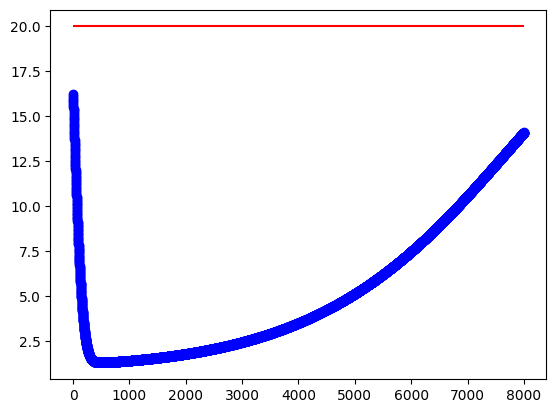

In [16]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(1, 8001, 8000), b_progress, color='blue')
plt.hlines(20, xmin=0, xmax=8000, color='red')

The predictions

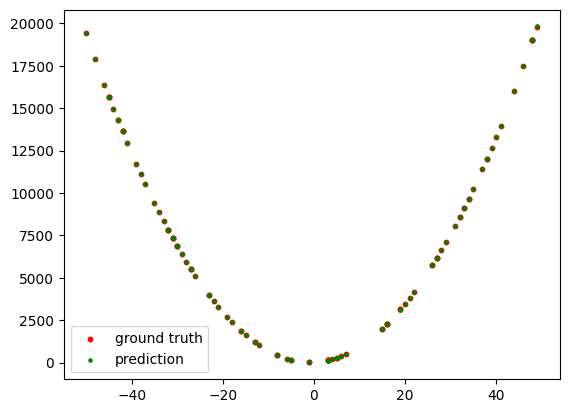

In [17]:
plt.scatter(X, Y, color='red', s=10, label='ground truth')
plt.scatter(X, quandratic(X), color='green', s=5, label='prediction')
plt.legend()

In [18]:
print(f'Y = {w1.numpy()[0]}X^2 + {w2.numpy()[0]}X + {b.numpy()[0]}')

print(f'Y = {round(w1.numpy()[0])}X^2 + {round(w2.numpy()[0])}X + {round(b.numpy()[0])}')

Y = 8.003951072692871X^2 + 11.99754810333252X + 14.108550071716309
Y = 8X^2 + 12X + 14


## Multiple Regression

You can also apply multiple regression in the same way.

$$
Y = W_1X_1 + W_2X_2 + W_3X_3 + b 
$$

In [19]:
def multiple_regression(x1, x2, x3):
    return w1 * x1 + w2 * x2  + w3 * x3 + b